In [1]:
# Import Systems 
import struct
import io
import os
import sys
import math

# Import Signal Process
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt

# User Libraries
import pyOssWavfile
import pyRoomAcoustic as room       # room acoustic parameter
import pyOssDebug as dbg            # for debug
import pyOssFilter

In [2]:
# Select.wav File Open

#############################################################################
#  Impulse Data Load -------------------------------------------------------#
#############################################################################

dir = 'impulse_sample'     # 프로젝트 내의 impulse wav files이 있는 폴더 이름

# IMPULSE WAVE FILE
# wav_fname = "ElvedenHallMarbleHall"
# wav_fname = "EmptyApartmentBedroom"
# wav_fname = "FalklandPalaceRoyalTennisCourt"
# wav_fname = "InsidePiano"
# wav_fname = "MaesHowe"
wav_fname = "mh3_000_ortf_48k"
# wav_fname = "SportsCentreUniversityOfYork"
# wav_fname = "StairwayUniversityOfYork"
# wav_fname = "StAndrewsChurch"
# wav_fname = "TyndallBruceMonument"
# wav_fname = "anechoic_gunshot_0"
# wav_fname = "10s sweep for 3s reverb 48k"

str_fileinfo = '_mono_f32_44.1k'    # 파일명에 부가된 정보

# Original Wavfile 
# fname = pyOssWavfile.str_fname(dir, wav_fname)

# mono,float32,44.1kHz 
fname = pyOssWavfile.str_fname(dir, wav_fname + str_fileinfo) # 전체경로, 파일명 조합

fmt_w, data_w, st_fmt_w, t_w = pyOssWavfile.readf32(fname)
data_n, st_fmt_n, t_n = pyOssWavfile.load_oss_npz(fname + '.npz')




0.032063492063492065


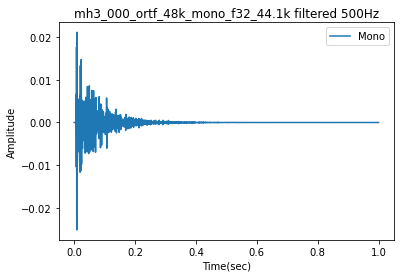

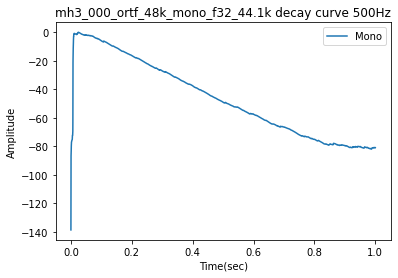

Impulse Name: mh3_000_ortf_48k_mono_f32_44.1k, Filter: Butterworth 2nd Order, 500Hz
T10= [[0.121]]
T20= [[0.184]]
T30= [[0.282]]
RT60(from T30*2)= [[0.564]]
EDT= [[0.726]]
D50= 0.7231295288837134
C50= 4.1693945655222295
C80= 8.850610480428667


In [5]:
# Filter

array_fc = [125, 250, 500, 1000, 2000, 4000, 8000, 16000]

fc = 500

data_w_filtered, decaycurve_w_filtered, acoustic_w_param = pyOssFilter.calc_filt_impulse(data_w, st_fmt_w.fs, fc, filt_type='butt',fname=wav_fname + str_fileinfo)

